In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import csv
import openpyxl

# Convert QuPath data to pandas

In [2]:
input_file = '/Users/jacquemi/working_dir/QuPath/Nissll/Result/404_cell_position.txt'
output_file = './404_cell_position.xls'

wb = openpyxl.Workbook()
ws = wb.worksheets[0]

with open(input_file, 'r') as data:
    reader = csv.reader(data, delimiter='\t')
    for row in reader:
        ws.append(row)

wb.save(output_file)
df_404 = pd.read_excel(output_file, index_col=0)

In [3]:
df_404

,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Detection probability,Area µm^2,Length µm,Circularity,...,Hematoxylin: Mean,Hematoxylin: Median,Hematoxylin: Min,Hematoxylin: Max,Hematoxylin: Std.Dev.,DAB: Mean,DAB: Median,DAB: Min,DAB: Max,DAB: Std.Dev.
Image,,,,,,,,,,,,,,,,,,,,,
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10994.1,1579.90,0.9553,204.0999,51.3083,0.9743,...,0.4352,0.4596,0.0985,0.6285,0.1088,-0.0564,-0.0650,-0.1214,0.0345,0.0307
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10338.3,1086.90,0.9483,141.9265,42.9522,0.9667,...,0.3894,0.3993,0.0851,0.7853,0.1471,-0.0271,-0.0311,-0.0993,0.0558,0.0345
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10910.0,1918.60,0.9421,78.1390,31.9661,0.9609,...,0.3618,0.4018,0.1157,0.5214,0.1028,-0.0338,-0.0439,-0.0819,0.0481,0.0311
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10814.4,1857.80,0.9394,106.1090,36.9105,0.9787,...,0.3775,0.4081,0.0821,0.5759,0.1284,-0.0219,-0.0319,-0.0770,0.0661,0.0350
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10864.3,860.66,0.9386,150.2629,44.0608,0.9727,...,0.3957,0.4206,0.1099,0.6633,0.1043,-0.0470,-0.0589,-0.1084,0.0572,0.0359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10156.0,1380.90,0.4702,29.2688,19.9869,0.9207,...,0.4403,0.4262,0.2824,0.6486,0.1003,-0.0518,-0.0514,-0.0971,-0.0153,0.0195
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,11446.9,1269.30,0.4702,20.3005,19.4503,0.6743,...,0.3809,0.3806,0.2474,0.6075,0.0756,-0.0391,-0.0442,-0.0832,0.0154,0.0245
SLD_0000404.vsi - 20x_01,PathDetectionObject,NaN,S1,Polygon,10433.2,2023.40,0.4700,23.5266,21.2471,0.6549,...,0.5055,0.4886,0.3132,0.7993,0.1060,-0.0701,-0.0670,-0.1213,-0.0357,0.0233


In [4]:
centroid_x = df_404['Centroid X µm'].to_numpy()
centroid_y = df_404['Centroid Y µm'].to_numpy()

#  analyse

In [5]:
button=centroid_y.min()
top=centroid_y.max()
z_length = 50 # um
nb_slice = 100

# compute fractions

In [6]:
length = top - button
fractions=np.zeros(centroid_y.shape[0], dtype=float)
for index, point in enumerate(centroid_y):
    fractions[index]=(point-button) / (length)

# Plot positions and fraction histogram

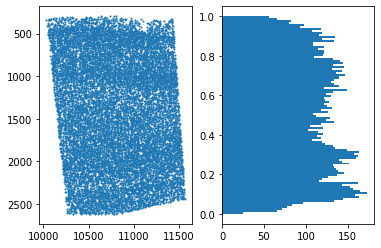

In [7]:
plt.subplot(121)
plt.gca().invert_yaxis()
_ = plt.scatter(centroid_x, centroid_y, s=1)
plt.subplot(122)
fract_hist = plt.hist(fractions, nb_slice, orientation='horizontal')

In [8]:
nb_points_per_bin = fract_hist[0]

# Split data by slice

In [9]:
centroid_x_per_slice = np.array_split(centroid_x, nb_slice)
centroid_y_per_slice = np.array_split(centroid_y, nb_slice)

In [10]:
points_per_slices = [] 
for i in range(nb_slice):
    points_per_slices.append(np.vstack((centroid_x_per_slice[i], centroid_y_per_slice[i])).T)


# Compute slices area thanks to from scipy.spatial.ConvexHull

In [11]:
slice_1_points = points_per_slices[0]

In [12]:
hulls = []
for i in range(nb_slice):
    hulls.append(ConvexHull(points_per_slices[i]))

slice Area: 2429928.1195000005


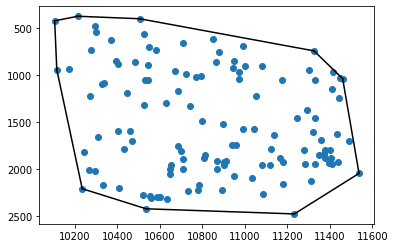

slice Area: 2484939.5515000015


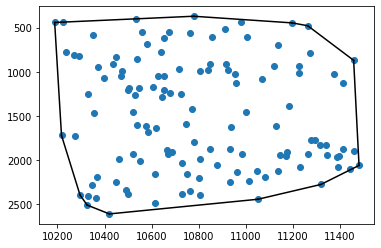

slice Area: 2405453.608000002


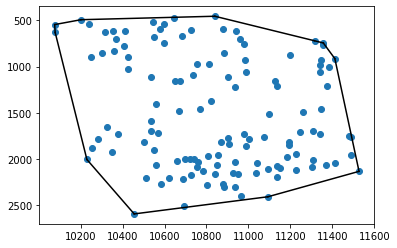

slice Area: 2536595.755500002


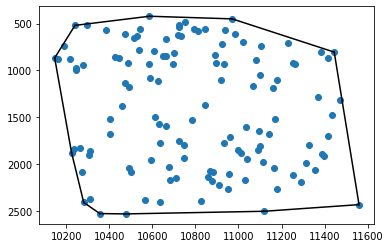

slice Area: 2507479.6105000004


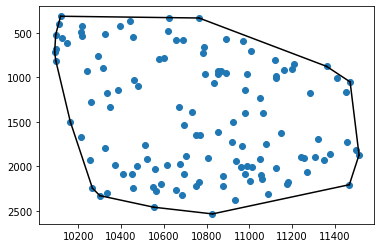

slice Area: 2541277.6060000025


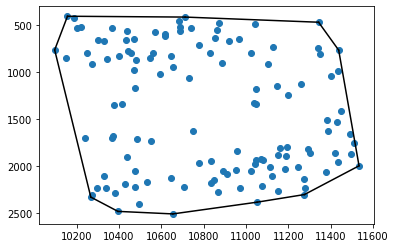

slice Area: 2511869.1575


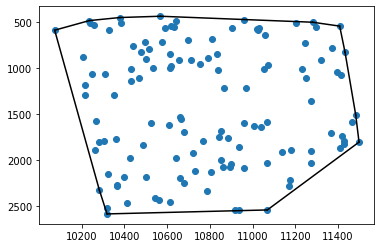

slice Area: 2592242.071000001


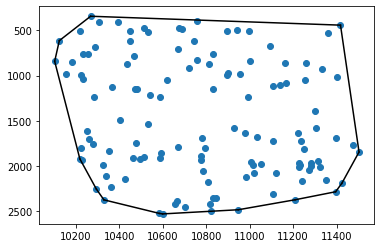

slice Area: 2532997.4449999994


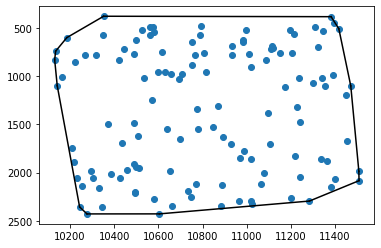

slice Area: 2657376.47


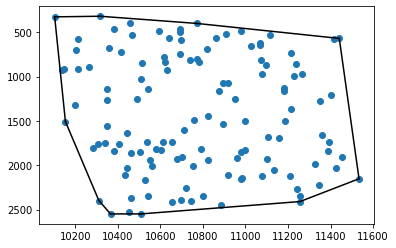

slice Area: 2660977.2570000016


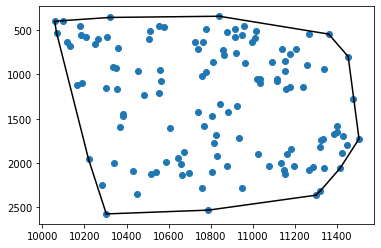

slice Area: 2591024.7024999983


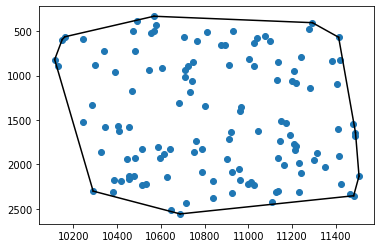

slice Area: 2606928.4980000006


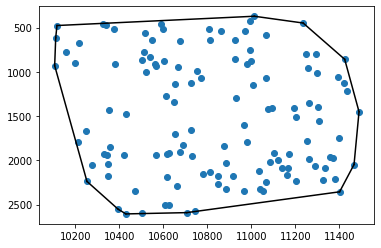

slice Area: 2727239.785


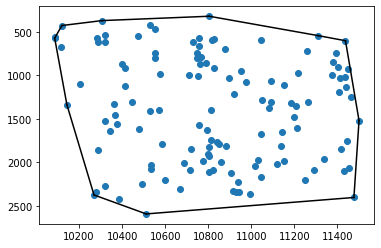

slice Area: 2575584.575500001


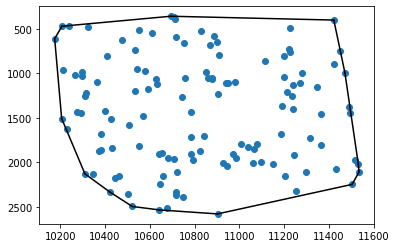

slice Area: 2656007.688500001


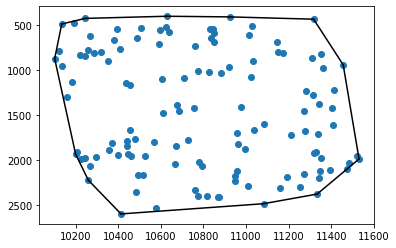

slice Area: 2717921.975000001


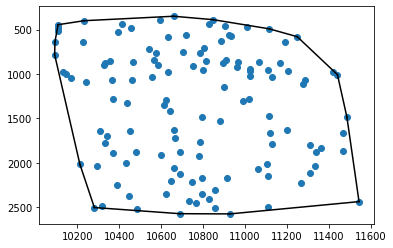

slice Area: 2710355.5799999987


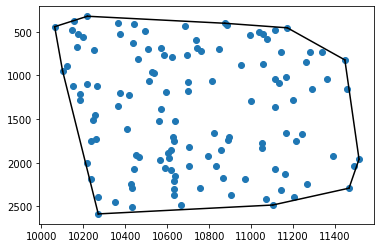

slice Area: 2713349.6185


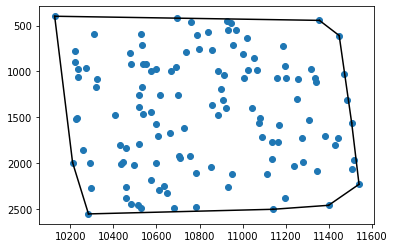

slice Area: 2576937.056500001


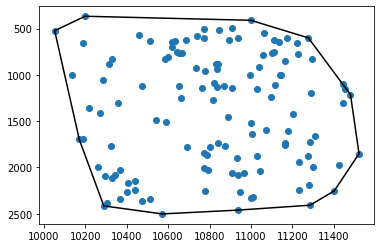

slice Area: 2691017.6584999985


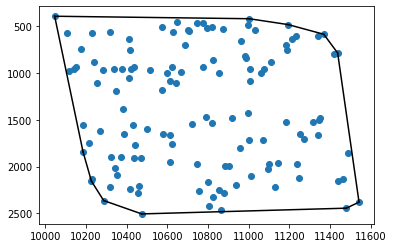

slice Area: 2727416.537999999


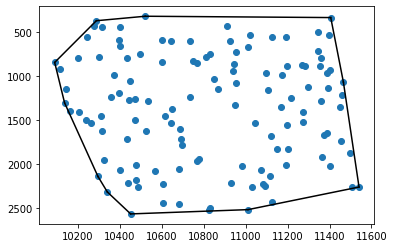

slice Area: 2685361.654999999


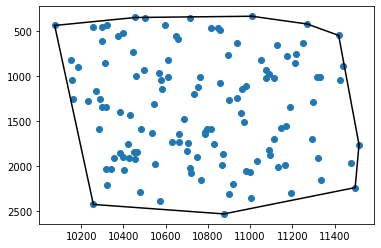

slice Area: 2735278.4884999986


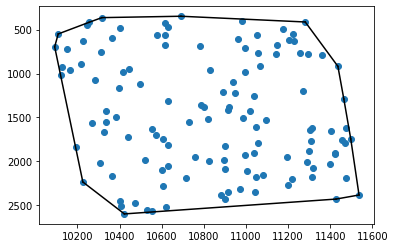

slice Area: 2688922.737999999


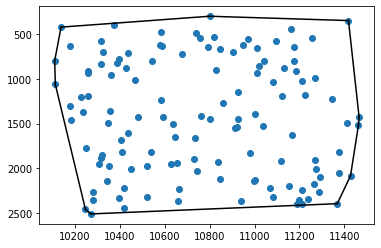

slice Area: 2732835.8439999977


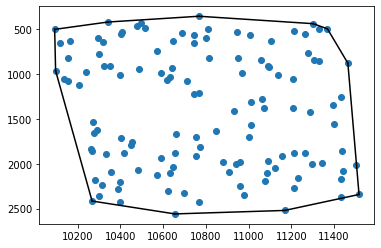

slice Area: 2730321.6495


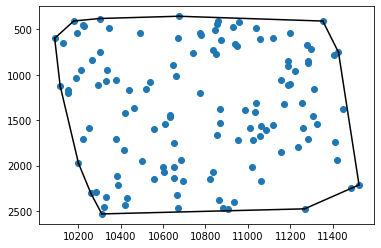

slice Area: 2851043.0765000004


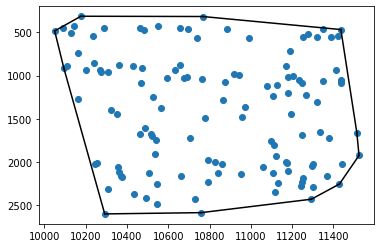

slice Area: 2614911.2815


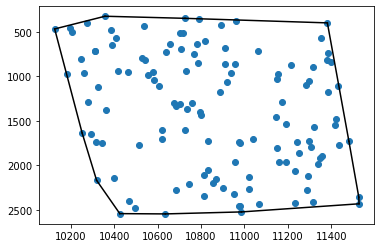

slice Area: 2673841.9905


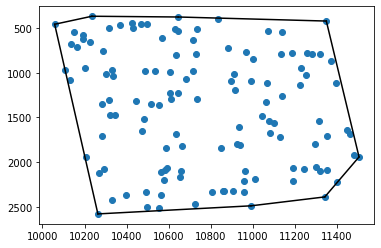

slice Area: 2783084.0234999997


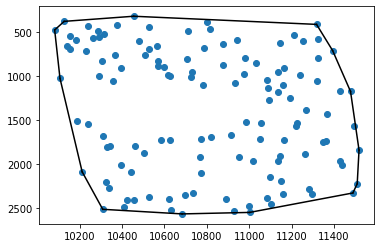

slice Area: 2722946.3175


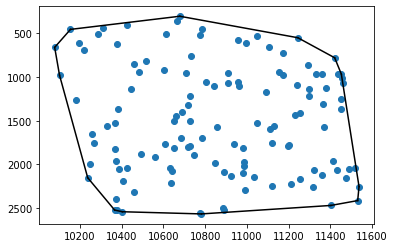

slice Area: 2735201.2530000014


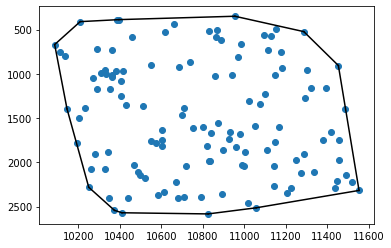

slice Area: 2686265.863999999


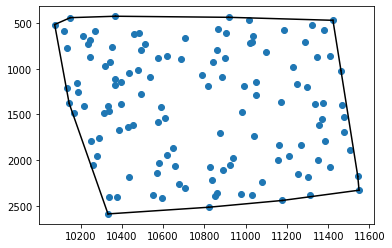

slice Area: 2531327.0139999995


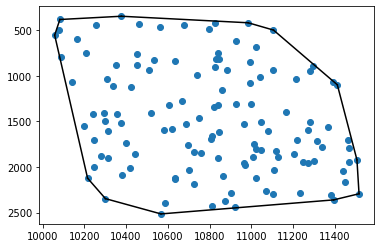

slice Area: 2627786.7229999998


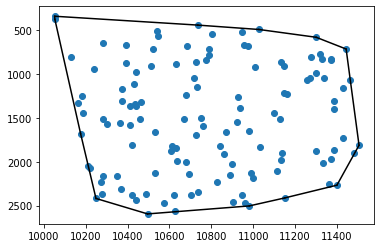

slice Area: 2560136.1719999993


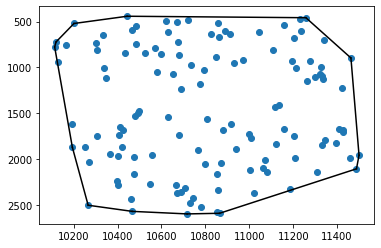

slice Area: 2663488.2039999976


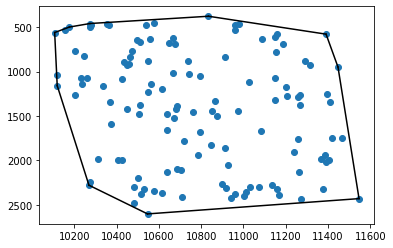

slice Area: 2533147.339499999


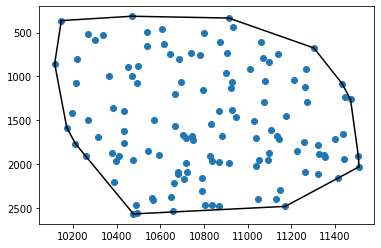

slice Area: 2798100.1694999994


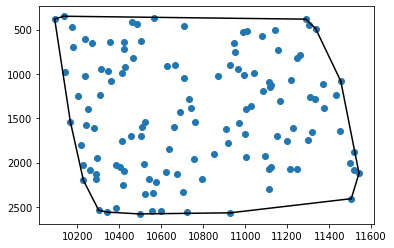

slice Area: 2721472.1255000005


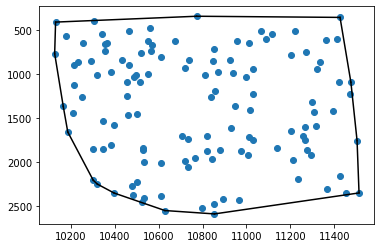

slice Area: 2637004.6010000007


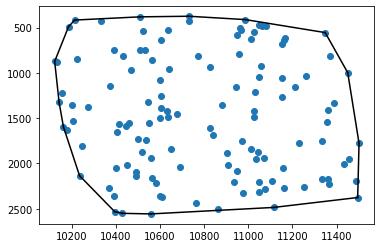

slice Area: 2706627.598500002


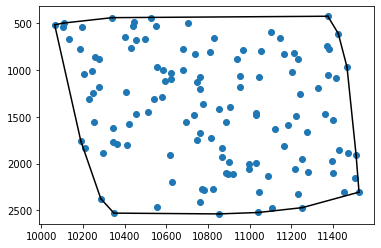

slice Area: 2715430.4475000016


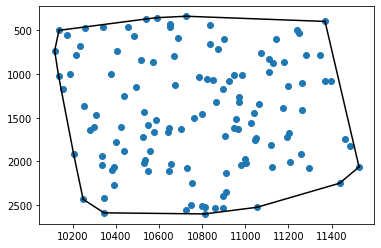

slice Area: 2712680.386500002


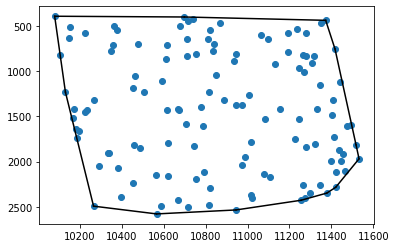

slice Area: 2761554.912499998


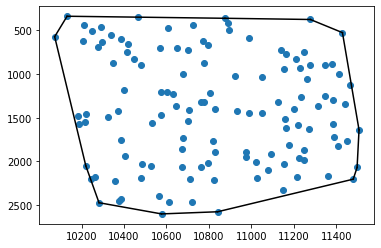

slice Area: 2576164.1815


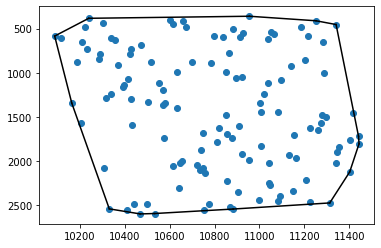

slice Area: 2725791.8040000014


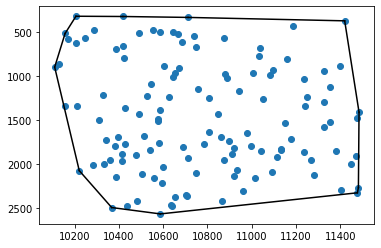

slice Area: 2668973.984


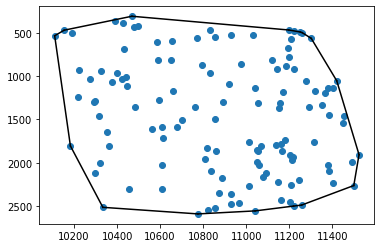

slice Area: 2834914.742999999


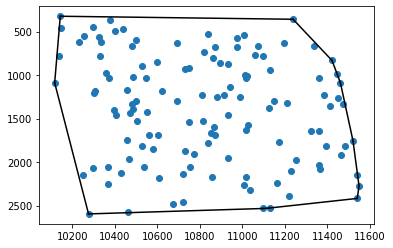

slice Area: 2628733.512999999


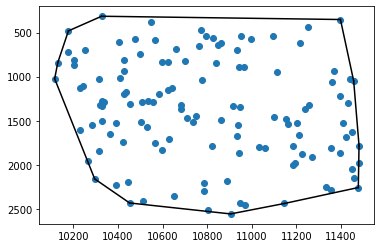

slice Area: 2662672.9690000005


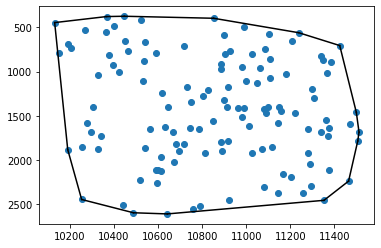

slice Area: 2563817.478


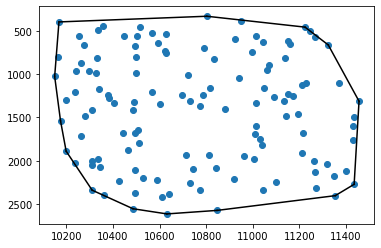

slice Area: 2578556.4329999993


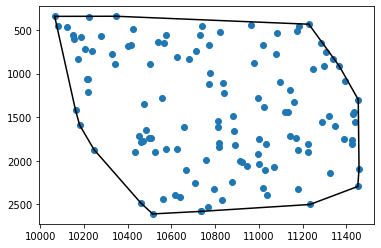

slice Area: 2736705.9020000007


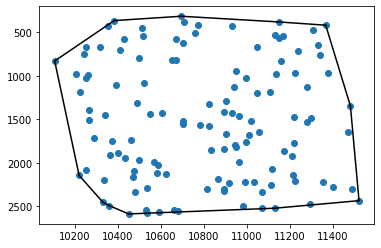

slice Area: 2830981.8835


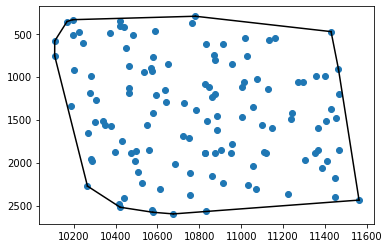

slice Area: 2716791.7155000013


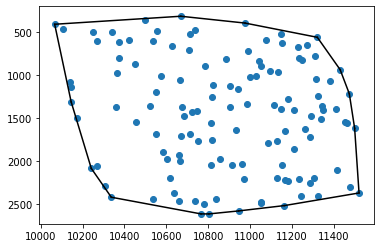

slice Area: 2719183.5925000003


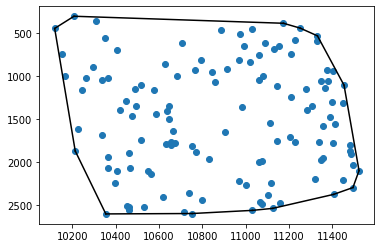

slice Area: 2640817.568999998


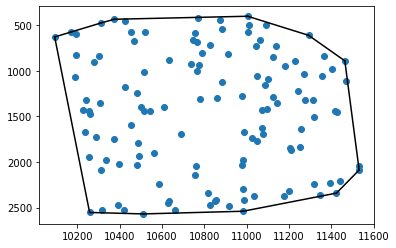

slice Area: 2630403.5395000004


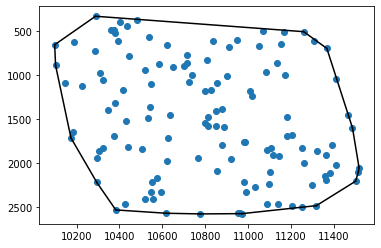

slice Area: 2574214.598


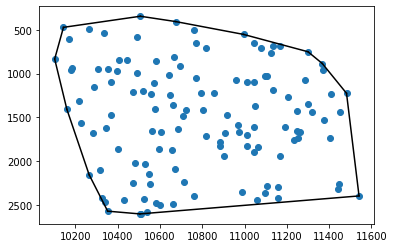

slice Area: 2572229.3520000014


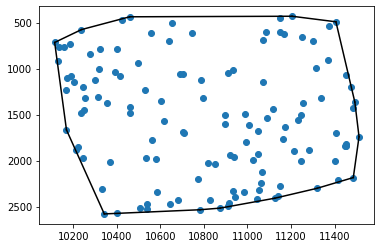

slice Area: 2766619.3370000003


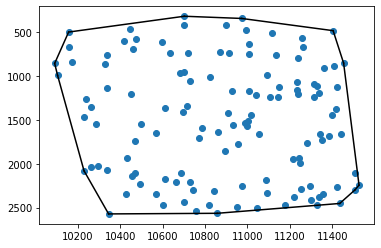

slice Area: 2619533.273499999


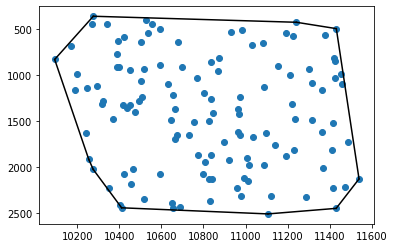

slice Area: 2895573.0279999985


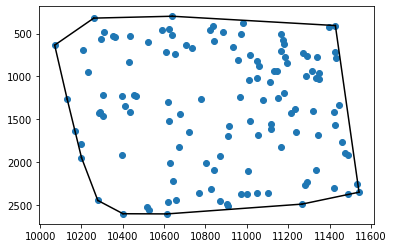

slice Area: 2866523.755500002


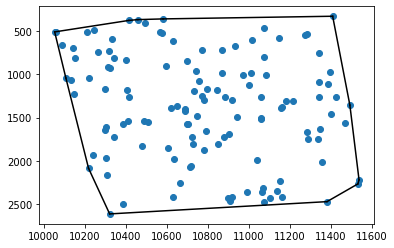

slice Area: 2717277.397


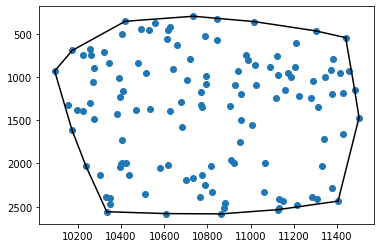

slice Area: 2646273.0614999994


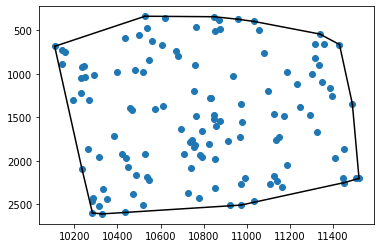

slice Area: 2905702.8749999995


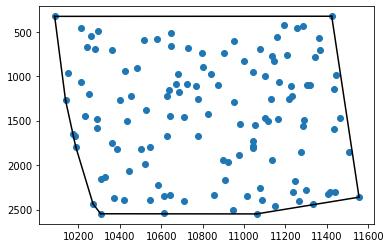

slice Area: 2664515.448500001


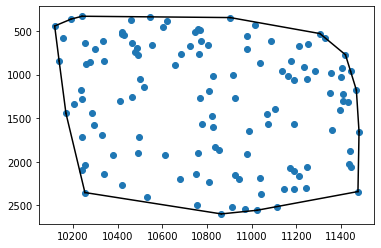

slice Area: 2729960.1269999994


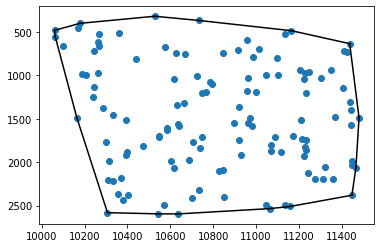

slice Area: 2643073.9759999993


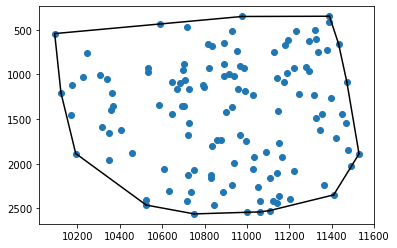

slice Area: 2712408.3119999995


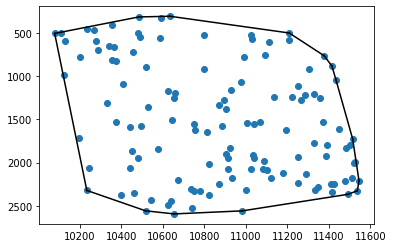

slice Area: 2688080.1130000018


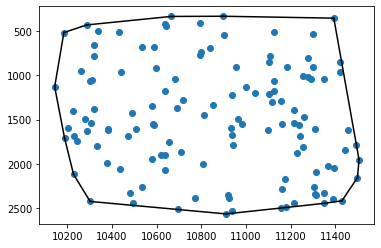

slice Area: 2620463.8444999983


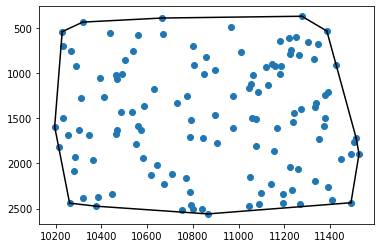

slice Area: 2817701.2030000016


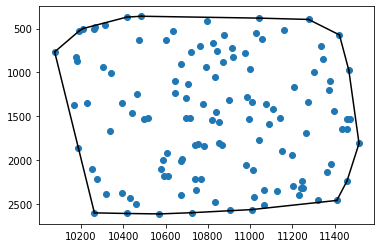

slice Area: 2610852.4660000014


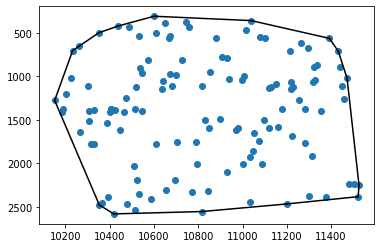

slice Area: 2837165.076


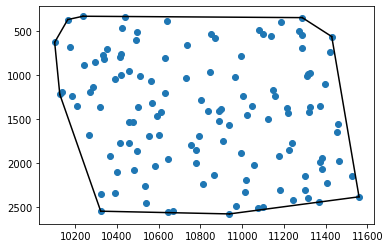

slice Area: 2905193.679500002


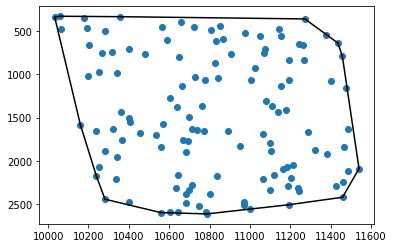

slice Area: 2795950.8670000006


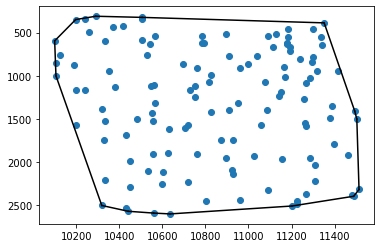

slice Area: 2713691.6909999987


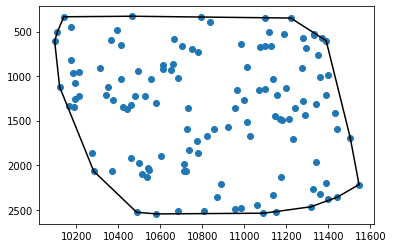

slice Area: 2744704.5405000015


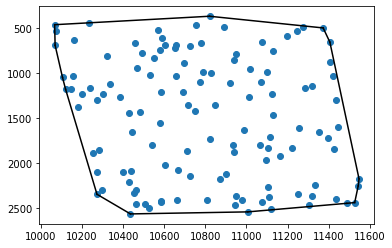

slice Area: 2676033.6204999997


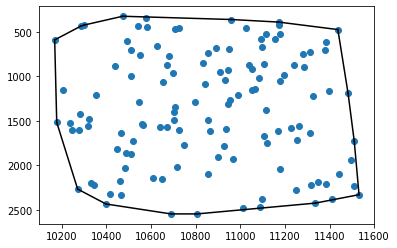

slice Area: 2720513.6390000004


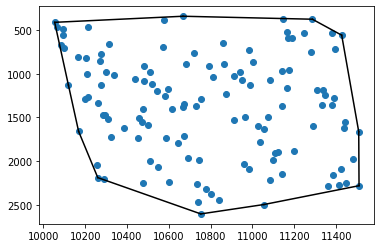

slice Area: 2747284.552500003


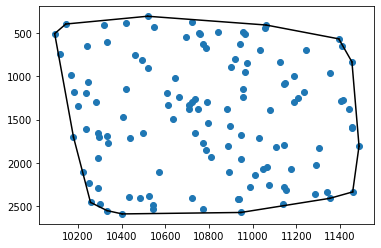

slice Area: 2769065.6559999986


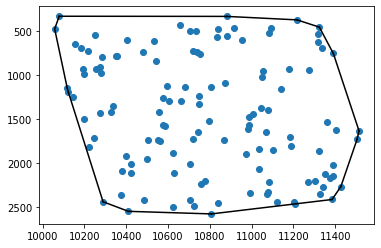

slice Area: 2829150.7024999997


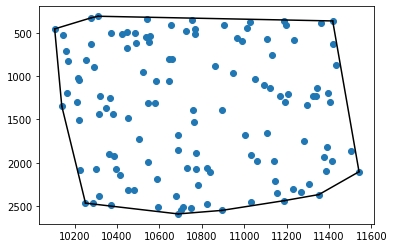

slice Area: 2668028.8965


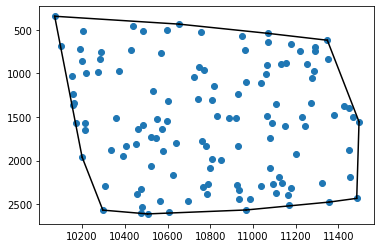

slice Area: 2629882.163500001


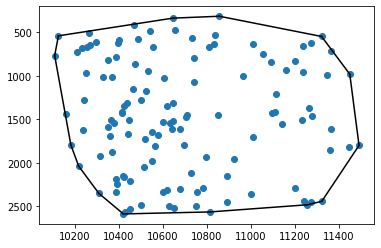

slice Area: 2870511.0415000003


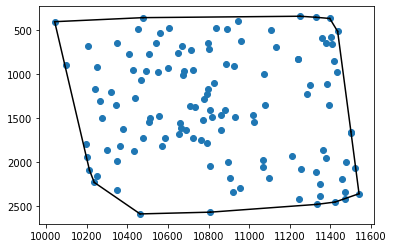

slice Area: 2830889.8410000005


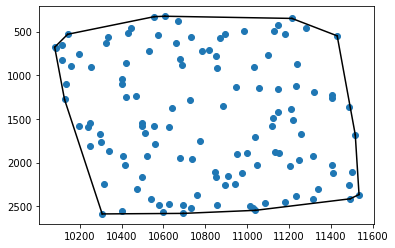

slice Area: 2598974.5334999994


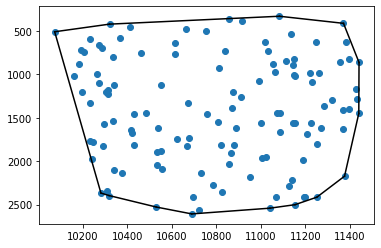

slice Area: 2744623.2044999986


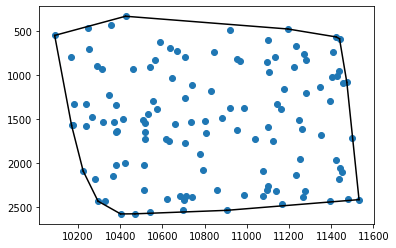

slice Area: 2731100.4884999995


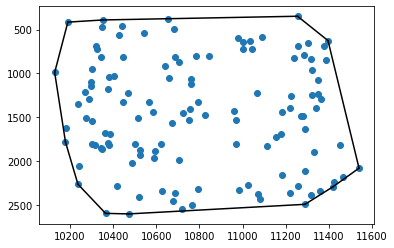

slice Area: 2624046.106


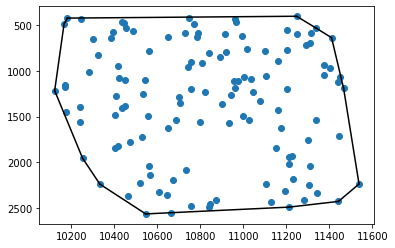

slice Area: 2839874.204499999


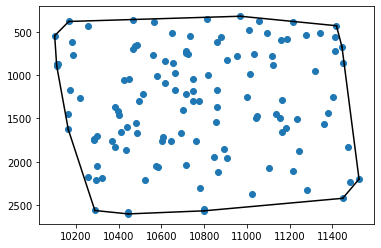

slice Area: 2621698.2665000004


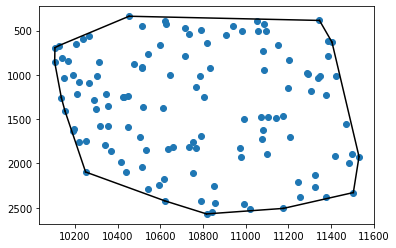

slice Area: 2661923.518500001


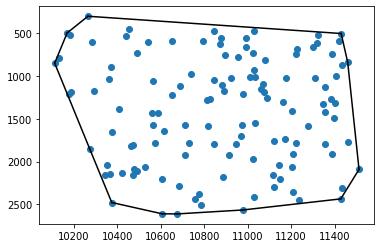

slice Area: 2613729.467499999


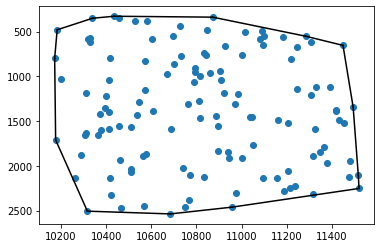

slice Area: 2757020.223999997


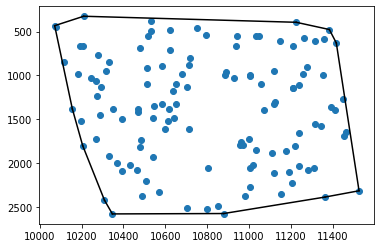

In [13]:
areas = []
for i in range(nb_slice):
    plt.gca().invert_yaxis()
    plt.plot(points_per_slices[i][:,0], points_per_slices[i][:,1], 'o')
    for simplex in hulls[i].simplices:
        plt.plot(points_per_slices[i][simplex, 0], points_per_slices[i][simplex, 1], 'k-')
    print('slice Area:', hulls[i].volume)
    areas.append(hulls[i].volume)
    plt.show()

(array([ 2.,  1.,  7., 11., 16., 16., 27.,  7.,  8.,  5.]),
 array([2405453.608 , 2455478.5347, 2505503.4614, 2555528.3881,
        2605553.3148, 2655578.2415, 2705603.1682, 2755628.0949,
        2805653.0216, 2855677.9483, 2905702.875 ]),
 <a list of 10 Patch objects>)

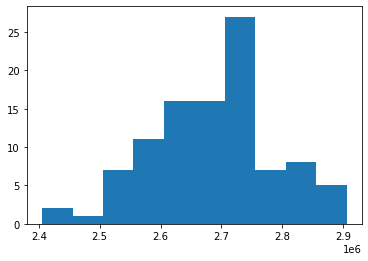

In [18]:
plt.hist(areas)

# Compute densities from fractions and volume

In [15]:
densities = nb_points_per_bin / (np.array(areas) * z_length)

(array([ 1.,  1.,  2.,  4.,  3., 16., 32., 24.,  8.,  9.]),
 array([2.05767404e-07, 3.15218080e-07, 4.24668757e-07, 5.34119434e-07,
        6.43570111e-07, 7.53020788e-07, 8.62471465e-07, 9.71922142e-07,
        1.08137282e-06, 1.19082350e-06, 1.30027417e-06]),
 <a list of 10 Patch objects>)

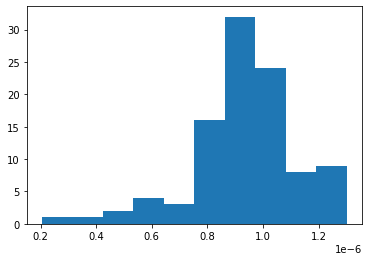

In [19]:
plt.hist(densities) # nb_cell by um3

In [ ]:
\